In [60]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [61]:
titanic = sns.load_dataset("titanic")

In [62]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [63]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [64]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [65]:
## Select some features from the dataset based on which we are going to construct the decision tree 
features = ["pclass","sex","fare","embarked","age"]
target = ["survived"]

In [66]:
# filling the features/columns with missing values - for that we will be using imputer from sklearn
from sklearn.impute import SimpleImputer
median_imputer = SimpleImputer(strategy = "mean")
titanic[["age"]] = median_imputer.fit_transform(titanic[["age"]])

most_frequent_imputer = SimpleImputer(strategy = "most_frequent")
titanic[["embarked","embark_town","deck"]]= most_frequent_imputer.fit_transform(titanic[["embarked","embark_town","deck"]])


In [67]:
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [68]:
## Encoding data --->>  for slected features - [age and embarked]
# we will do LabelEncoding

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

titanic["sex"] = le.fit_transform(titanic["sex"])
titanic["embarked"]= le.fit_transform(titanic["embarked"])



In [69]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,Third,man,True,C,Southampton,no,False
1,1,1,0,38.0,1,0,71.2833,0,First,woman,False,C,Cherbourg,yes,False
2,1,3,0,26.0,0,0,7.9250,2,Third,woman,False,C,Southampton,yes,True
3,1,1,0,35.0,1,0,53.1000,2,First,woman,False,C,Southampton,yes,False
4,0,3,1,35.0,0,0,8.0500,2,Third,man,True,C,Southampton,no,True


In [70]:
# split data into X and Y
X = titanic[features]
Y = titanic[target]

In [71]:
X.head()

,pclass,sex,fare,embarked,age
0,3,1,7.2500,2,22.0
1,1,0,71.2833,0,38.0
2,3,0,7.9250,2,26.0
3,1,0,53.1000,2,35.0
4,3,1,8.0500,2,35.0


In [72]:
Y.head()

,survived
0,0
1,1
2,1
3,1
4,0


In [73]:
# train test split -->>
X_train, X_test, y_train, y_test = train_test_split(
    X, Y , test_size = 0.2, random_state = 42
)

In [74]:
X_test.head()

,pclass,sex,fare,embarked,age
709,3,1,15.2458,0,29.699118
439,2,1,10.5000,2,31.000000
840,3,1,7.9250,2,20.000000
720,2,0,33.0000,2,6.000000
39,3,0,11.2417,0,14.000000


In [75]:
# Build Decision Tree Classifier Model -->>
from sklearn.tree import DecisionTreeClassifier
model  = DecisionTreeClassifier()
dt_model = model.fit(X_train, y_train)
dt_model

DecisionTreeClassifier()

In [76]:
y_pred = dt_model.predict(X_test)

In [77]:
y_pred

array([0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1])

In [78]:
# Model Evaluation --->>
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Decision Tree Model Evaluation")
print("  ---->>  Accuracy Score : ",accuracy_score(y_pred,y_test)*100,"%")
print("  ---->>  Precision Score : ",precision_score(y_pred,y_test)*100,"%")
print("  ---->>  Accuracy Score : ",recall_score(y_pred,y_test)*100,"%")
print("  ---->>  Accuracy Score : ",f1_score(y_pred,y_test)*100,"%")

Decision Tree Model Evaluation
  ---->>  Accuracy Score :  76.53631284916202 %
  ---->>  Precision Score :  74.32432432432432 %
  ---->>  Accuracy Score :  70.51282051282051 %
  ---->>  Accuracy Score :  72.36842105263158 %


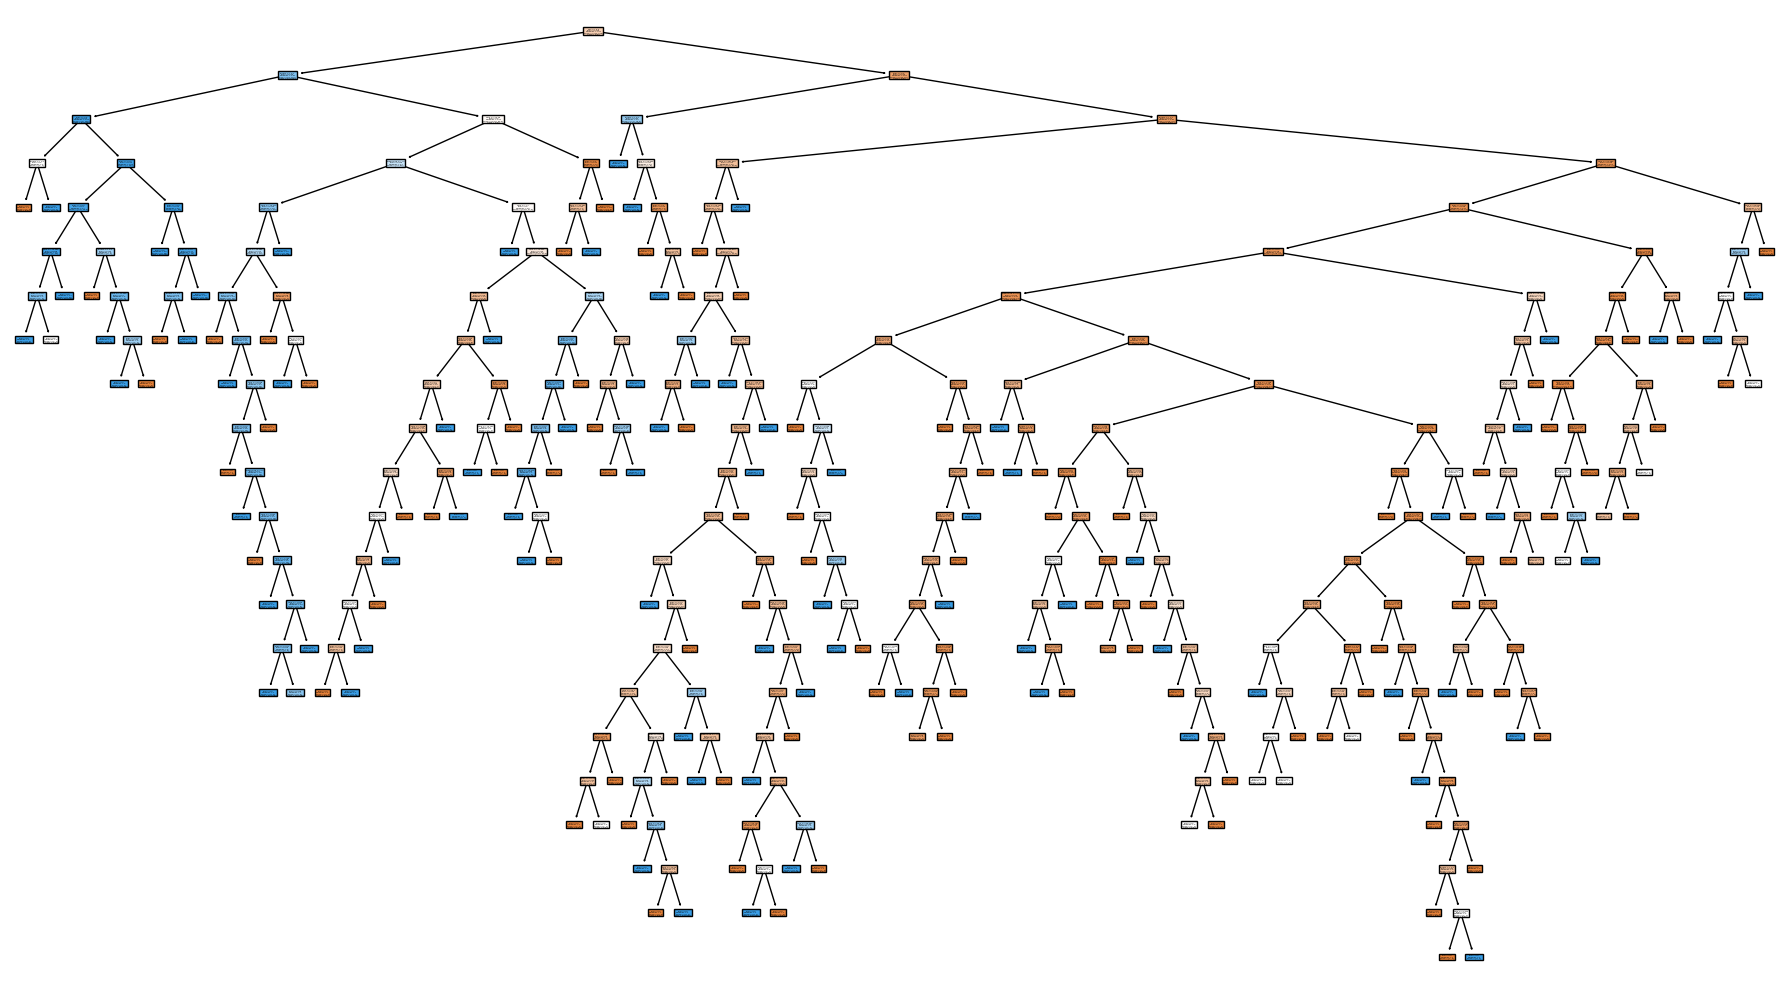

In [79]:
# Plot Decison Tree Model -->>
from sklearn.tree import plot_tree
plt.figure(figsize = (18,10))
plot_tree(
    model,
    feature_names = X.columns,
    class_names = ["Died","Survived"],
    filled = True,
    # max_depth = 4 // zooms the tree diagram and only show the defined depth level
)

plt.tight_layout()
plt.show()

## Decision Tree With Pre-Pruning

for depth = 2
 --->> accuracy score : 76.53631284916202%
 --->> precision score : 50.0%
 --->> recall score : 88.09523809523809%
 --->> f1 score : 63.793103448275865%
for depth = 3
 --->> accuracy score : 79.88826815642457%
 --->> precision score : 68.91891891891892%
 --->> recall score : 79.6875%
 --->> f1 score : 73.91304347826086%
for depth = 4
 --->> accuracy score : 79.88826815642457%
 --->> precision score : 63.51351351351351%
 --->> recall score : 83.92857142857143%
 --->> f1 score : 72.3076923076923%


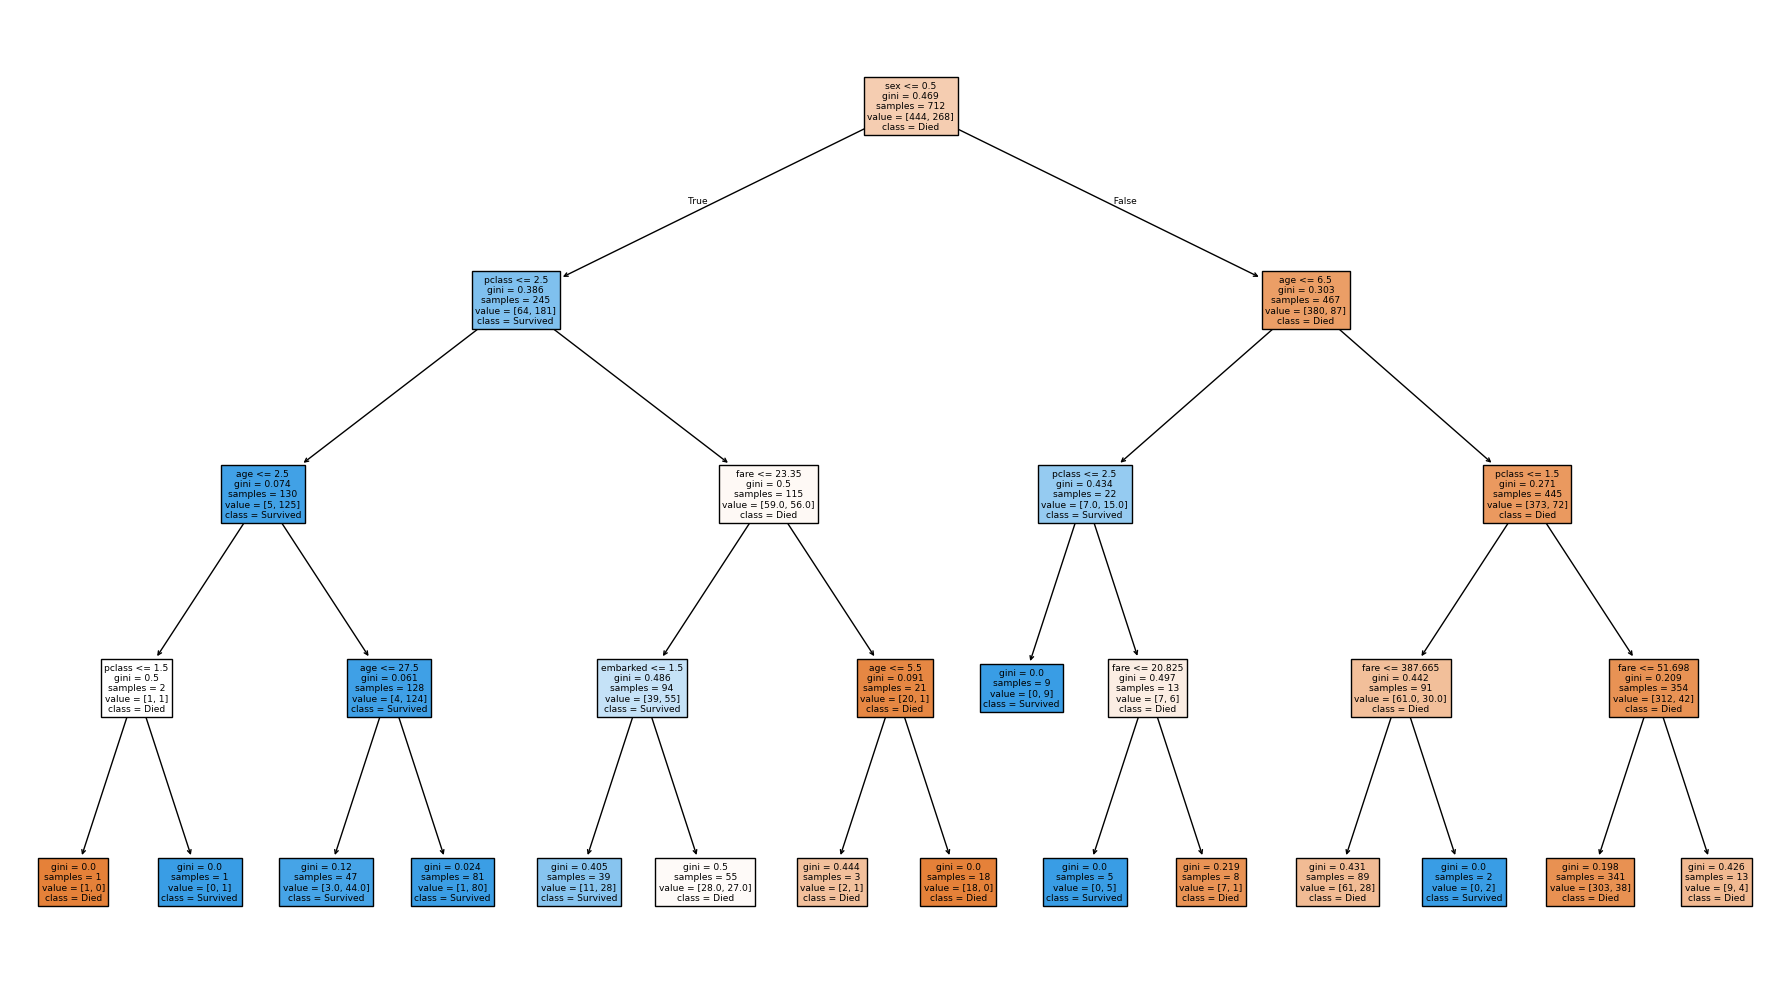

for depth = 5
 --->> accuracy score : 79.88826815642457%
 --->> precision score : 64.86486486486487%
 --->> recall score : 82.75862068965517%
 --->> f1 score : 72.72727272727273%
for depth = 6
 --->> accuracy score : 80.44692737430168%
 --->> precision score : 64.86486486486487%
 --->> recall score : 84.21052631578947%
 --->> f1 score : 73.2824427480916%
for depth = 7
 --->> accuracy score : 79.88826815642457%
 --->> precision score : 66.21621621621621%
 --->> recall score : 81.66666666666667%
 --->> f1 score : 73.13432835820896%
for depth = 8
 --->> accuracy score : 78.77094972067039%
 --->> precision score : 64.86486486486487%
 --->> recall score : 80.0%
 --->> f1 score : 71.64179104477611%
for depth = 9
 --->> accuracy score : 79.3296089385475%
 --->> precision score : 68.91891891891892%
 --->> recall score : 78.46153846153847%
 --->> f1 score : 73.38129496402878%
for depth = 10
 --->> accuracy score : 79.3296089385475%
 --->> precision score : 68.91891891891892%
 --->> recall score

In [108]:
# Pre-Pruning Rule Used --> max_depth
max_depths = [2,3,4,5,6,7,8,9,10]

for depth in max_depths:
    model = DecisionTreeClassifier(max_depth = depth)
    dtpp = model.fit(X_train, y_train)

    y_pred = dtpp.predict(X_test)
    print(f"for depth = {depth}\n --->> accuracy score : {accuracy_score(y_pred,y_test)*100}%\n --->> precision score : {precision_score(y_pred,y_test)*100}%\n --->> recall score : {recall_score(y_pred,y_test)*100}%\n --->> f1 score : {f1_score(y_pred,y_test)*100}%")

    # display the tree structure when depth = 4 
    if depth == 4:
        plt.figure(figsize = (18,10))
        plot_tree(
            model,
            feature_names = X.columns,
            class_names = ["Died","Survived"],
            filled = True,
            # max_depth = 4 // zooms the tree diagram and only show the defined depth level
        )
        
        plt.tight_layout()
        plt.show()
                
 
    

for depth = 5
 --->> accuracy score : 78.77094972067039%
 --->> precision score : 71.62162162162163%
 --->> recall score : 75.71428571428571%
 --->> f1 score : 73.61111111111111%
for depth = 10
 --->> accuracy score : 82.12290502793296%
 --->> precision score : 75.67567567567568%
 --->> recall score : 80.0%
 --->> f1 score : 77.77777777777779%


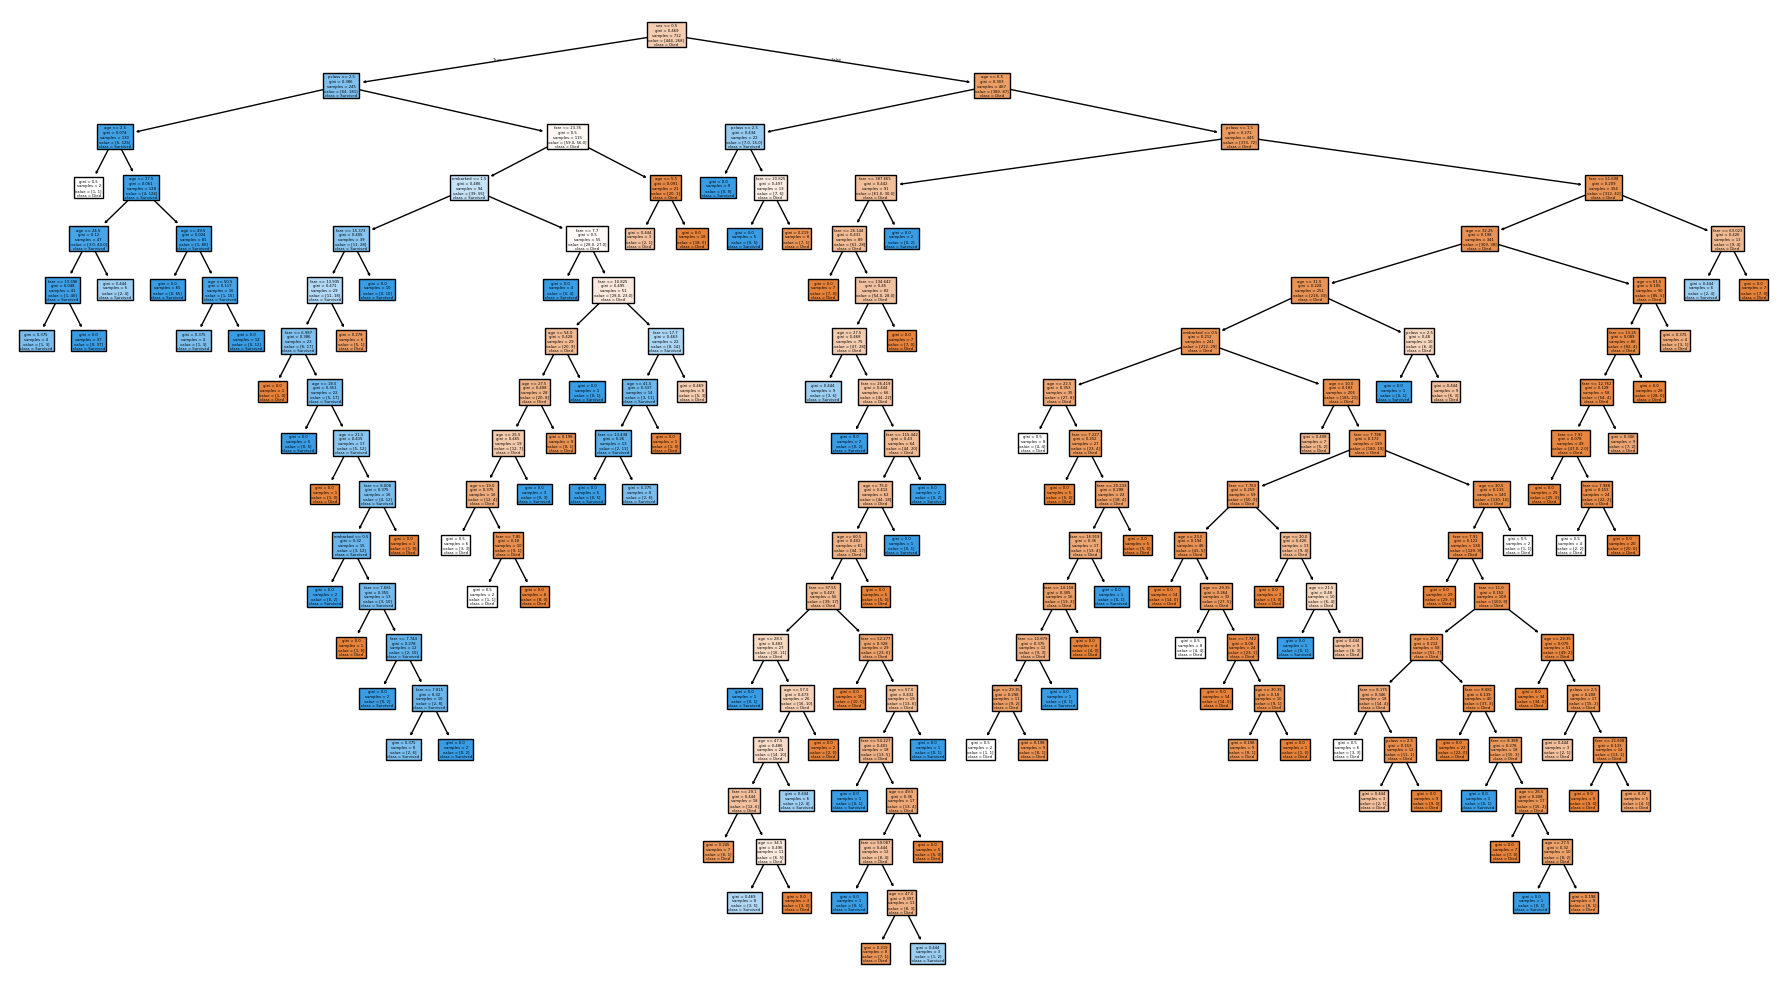

for depth = 15
 --->> accuracy score : 82.68156424581005%
 --->> precision score : 72.97297297297297%
 --->> recall score : 83.07692307692308%
 --->> f1 score : 77.6978417266187%
for depth = 20
 --->> accuracy score : 83.79888268156425%
 --->> precision score : 72.97297297297297%
 --->> recall score : 85.71428571428571%
 --->> f1 score : 78.83211678832117%
for depth = 25
 --->> accuracy score : 82.68156424581005%
 --->> precision score : 72.97297297297297%
 --->> recall score : 83.07692307692308%
 --->> f1 score : 77.6978417266187%
for depth = 30
 --->> accuracy score : 81.00558659217877%
 --->> precision score : 72.97297297297297%
 --->> recall score : 79.41176470588235%
 --->> f1 score : 76.05633802816901%


In [109]:
# Pre-Pruning Rule Used --> min_samples_splits
min_samples_splits = [5, 10,15,20,25,30]

for split in min_samples_splits:
    model = DecisionTreeClassifier(min_samples_split = split)
    dtpp = model.fit(X_train, y_train)

    y_pred = dtpp.predict(X_test)
    print(f"for depth = {split}\n --->> accuracy score : {accuracy_score(y_pred,y_test)*100}%\n --->> precision score : {precision_score(y_pred,y_test)*100}%\n --->> recall score : {recall_score(y_pred,y_test)*100}%\n --->> f1 score : {f1_score(y_pred,y_test)*100}%")

    if split == 10:
        plt.figure(figsize = (18,10))
        plot_tree(
            model,
            feature_names = X.columns,
            class_names = ["Died","Survived"],
            filled = True,
            # max_depth = 4 // zooms the tree diagram and only show the defined depth level
        )
        
        plt.tight_layout()
        plt.show()
 
    

## Decision Tree With Post-Pruning

In [110]:
# Grown/construct Complete tree - that means simple/normal model
full_tree = DecisionTreeClassifier(random_state = 42)
full_tree.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [115]:
# calculate cost complexity and find all ccp_alphas values
path = full_tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
print(ccp_alphas)

[0.00000000e+00 0.00000000e+00 3.12109863e-05 6.68806849e-05
 8.91742465e-05 1.63857678e-04 2.00642055e-04 2.34082397e-04
 2.34082397e-04 3.51123596e-04 4.68164794e-04 4.68164794e-04
 4.68164794e-04 4.68164794e-04 5.35045479e-04 5.61797753e-04
 6.24219725e-04 6.24219725e-04 6.67991230e-04 7.02247191e-04
 8.19288390e-04 8.19288390e-04 8.42696629e-04 8.42696629e-04
 8.42696629e-04 8.94231048e-04 9.24769963e-04 9.36329588e-04
 9.36329588e-04 9.36329588e-04 1.01064146e-03 1.05337079e-03
 1.07400895e-03 1.07953294e-03 1.08038029e-03 1.11865144e-03
 1.12359551e-03 1.12359551e-03 1.13139825e-03 1.17041199e-03
 1.18841832e-03 1.22566125e-03 1.22893258e-03 1.22893258e-03
 1.24843945e-03 1.27565833e-03 1.30996111e-03 1.33761370e-03
 1.37044603e-03 1.51229549e-03 1.56737310e-03 1.60434338e-03
 1.64211936e-03 1.66892062e-03 1.75561798e-03 1.76144762e-03
 1.86751451e-03 2.10674157e-03 2.41226470e-03 2.64273538e-03
 2.69412911e-03 3.43770913e-03 3.56327570e-03 5.47433606e-03
 9.05540038e-03 1.392950

In [124]:
# pick best alpha - to pick best alpha, we have to train out model for all alphas

trees = []
for alpha in ccp_alphas:
    model = DecisionTreeClassifier(random_state = 42, ccp_alpha = alpha)
    model.fit(X_train,y_train)

    trees.append((model,alpha))

In [128]:
best_accuracy = 0
best_alpha = 0

for model, alpha in trees:
    curr_accuracy = model.score(X_test,y_test)
    if curr_accuracy > best_accuracy:
        best_accuracy = curr_accuracy
        best_alpha = alpha

In [129]:
best_alpha

np.float64(0.0017556179775280898)

In [130]:
best_accuracy

0.8379888268156425

In [132]:
# now based on the best alpha and best accuracy - we will train/prune our best decision tree model

best_model = DecisionTreeClassifier(ccp_alpha = best_alpha)
best_model.fit(X_train,y_train)


DecisionTreeClassifier(ccp_alpha=np.float64(0.0017556179775280898))

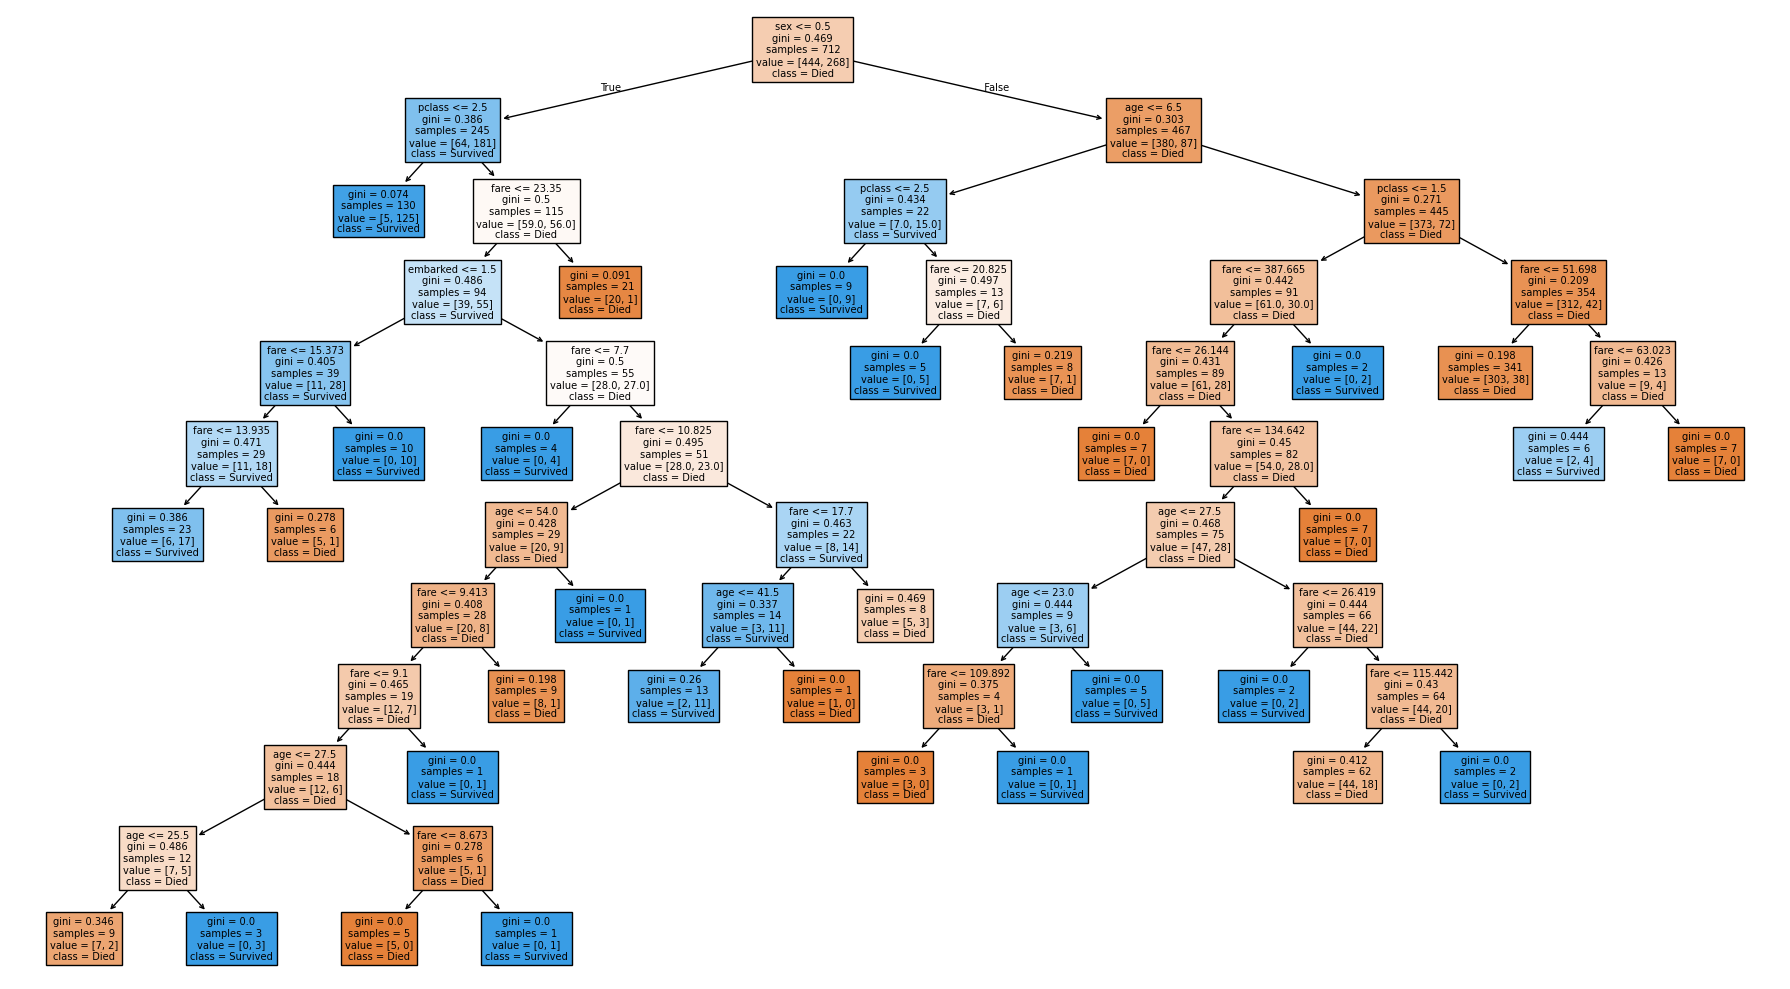

This is the best Decison Tree 
Accuracy score for the Best Model : 83.79888268156425 %


In [139]:
plt.figure(figsize = (18,10))
plot_tree(
    best_model,
    feature_names = X.columns,
    class_names = ["Died","Survived"],
    filled = True,
    )
        
plt.tight_layout()
plt.show()

print("This is the best Decison Tree ")
print(f"Accuracy score for the Best Model : {best_model.score(X_test,y_test)*100} %")